In [66]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [13]:
specification = specs.CoiledCoil.from_parameters

In [14]:
sequences = ['ELKAIAQELKAIAKELKAIAWELKAIAQ', 'ELKAIAQELKAIAKELKAIAWELKAIAQ']

In [15]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 28),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', 283, 27),  # 283 is equivalent to a g position
]

In [17]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 28, 5.0, 200, 283]


In [18]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [19]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [21]:
opt_ga.run_opt(100, 20, cores=8)

gen	evals	avg     	std    	min     	max     
0  	72   	-801.282	27.1484	-859.884	-757.323
1  	70   	-831.382	18.5218	-863.809	-792.138
2  	76   	-850.015	8.34482	-867.953	-831.382
3  	76   	-859.292	5.72597	-871.005	-849.972
4  	70   	-864.257	3.70448	-871.005	-856.642
5  	65   	-866.816	2.3365 	-871.005	-862.215
6  	69   	-868.68 	1.4362 	-871.005	-865.787
7  	65   	-869.832	0.849588	-871.005	-867.931
8  	63   	-870.522	0.306269	-871.017	-869.743
9  	64   	-870.766	0.142704	-871.171	-870.425
10 	83   	-870.888	0.115848	-871.305	-870.74 
11 	84   	-870.996	0.13134 	-871.32 	-870.815
12 	69   	-871.104	0.119495	-871.328	-870.909
13 	90   	-871.234	0.0592099	-871.373	-871.108
14 	72   	-871.28 	0.0348849	-871.373	-871.21 
15 	63   	-871.298	0.027367 	-871.373	-871.258
16 	89   	-871.315	0.0251975	-871.397	-871.276
17 	67   	-871.328	0.0219393	-871.397	-871.296
18 	60   	-871.334	0.0220906	-871.397	-871.301
19 	64   	-871.341	0.022676 	-871.409	-871.308
Evaluated 1531 models in total in 0

In [45]:
optimized_model_ga = opt_ga.best_model

In [33]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-871.409499310849

In [75]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [76]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

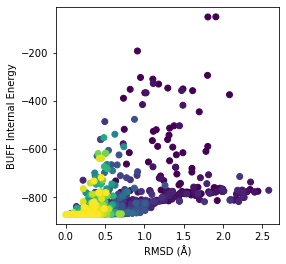

In [77]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [70]:
f = open('optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [22]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [36]:
opt_de.run_opt(100, 20, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-717.885	160.905	-865.264	-122.726
1  	100  	-786.914	49.5441	-865.264	-450.353
2  	100  	-803.206	21.4234	-865.264	-759.809
3  	100  	-812.39 	20.9855	-865.264	-776.17 
4  	100  	-824.035	19.819 	-865.264	-780.571
5  	100  	-831.103	19.1023	-865.264	-782.569
6  	100  	-840.535	16.0983	-871.473	-800.456
7  	100  	-847.977	13.5161	-871.473	-810.646
8  	100  	-854.216	10.4757	-871.473	-824.047
9  	100  	-858.718	8.49345	-871.473	-824.047
10 	100  	-862.33 	6.21461	-871.714	-833.782
11 	100  	-864.96 	4.4898 	-871.714	-854.508
12 	100  	-867.063	3.53512	-871.893	-855.518
13 	100  	-868.744	2.26281	-871.893	-859.301
14 	100  	-869.915	1.3486 	-871.893	-865.077
15 	100  	-870.58 	0.882259	-872.211	-868.016
16 	100  	-870.95 	0.635689	-872.211	-868.719
17 	100  	-871.285	0.495193	-872.237	-869.17 
18 	100  	-871.513	0.349008	-872.237	-870.637
19 	100  	-871.684	0.282986	-872.391	-871.01 
Evaluated 2000 models in total in 0:03:15.166408
B

In [37]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-872.3908857008227

In [49]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [78]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

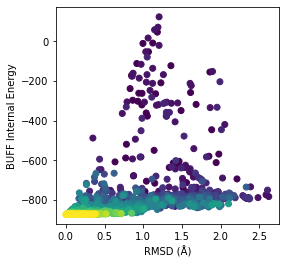

In [79]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [71]:
f = open('optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [52]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [53]:
opt_pso.run_opt(100, 20, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-691.964	181.122	-860.496	95.2444
1  	88   	-667.706	238.347	-863.544	321.384
2  	73   	-572.302	283.513	-868.371	321.384
3  	67   	-475.259	265.193	-848.951	321.384
4  	82   	-639.019	230.663	-861.366	188.692
5  	79   	-749.681	135.96 	-865.155	63.1878
6  	84   	-686.233	209.162	-861.822	169.646
7  	67   	-581.164	268.631	-860.361	244.819
8  	63   	-589.38 	262.214	-869.744	427.614
9  	76   	-658.861	204.239	-870.227	427.614
10 	90   	-731.673	108.59 	-870.19 	-287.677
11 	96   	-698.225	194.757	-860.324	295.208 
12 	78   	-668.119	217.914	-867.675	295.208 
13 	79   	-719.475	142.718	-850.171	196.949 
14 	91   	-770.132	107.597	-858.721	-285.809
15 	91   	-626.915	250.464	-854.621	258.997 
16 	62   	-603.605	263.943	-866.394	258.997 
17 	72   	-680.459	234.476	-861.616	258.997 
18 	92   	-774.793	93.8363	-851.829	-245.594
19 	95   	-743.652	146.882	-864.115	-90.9589
Evaluated 1625 models in total in 0:02:45.243281
Best fitness is (

In [54]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-870.2269134526965

In [55]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [80]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

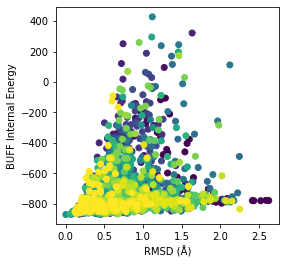

In [81]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [72]:
f = open('optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [58]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [59]:
opt_cmaes.run_opt(100, 20, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-728.855	102.831	-849.607	-194.663
1  	100  	-669.56 	230.009	-849.767	270.679 
2  	100  	-761.537	103.703	-854.703	-305.065
3  	100  	-772.492	81.2735	-864.882	-416.337
4  	100  	-828.499	30.5759	-868.789	-642.358
5  	100  	-834.037	34.5453	-869.996	-646.789
6  	100  	-845.646	21.6785	-868.453	-774.203
7  	100  	-858.497	10.598 	-870.101	-807.803
8  	100  	-862.399	9.81113	-871.256	-797.597
9  	100  	-867.23 	2.68995	-871.447	-856.87 
10 	100  	-869.07 	1.96435	-871.733	-861.341
11 	100  	-870.247	1.40519	-872.423	-863.381
12 	100  	-870.262	1.93123	-872.373	-861.881
13 	100  	-871.533	0.699508	-872.476	-867.962
14 	100  	-871.709	0.581182	-872.481	-869.055
15 	100  	-872.026	0.405635	-872.518	-870.591
16 	100  	-872.295	0.215034	-872.582	-871.308
17 	100  	-872.327	0.227856	-872.59 	-871.196
18 	100  	-872.474	0.0848646	-872.598	-872.165
19 	100  	-872.502	0.0797154	-872.657	-872.068
Evaluated 2100 models in total in 0:03:21.9525

In [61]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-872.6565470815498

In [62]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [82]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

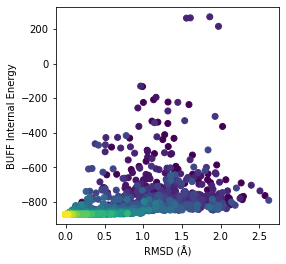

In [83]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [73]:
f = open('optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)